In [3]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train=pd.read_csv('train.csv')
train.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29


In [5]:
train["Claim"]=train["Claim"].replace(0,"No")
train["Claim"]=train["Claim"].replace(1,"Yes")

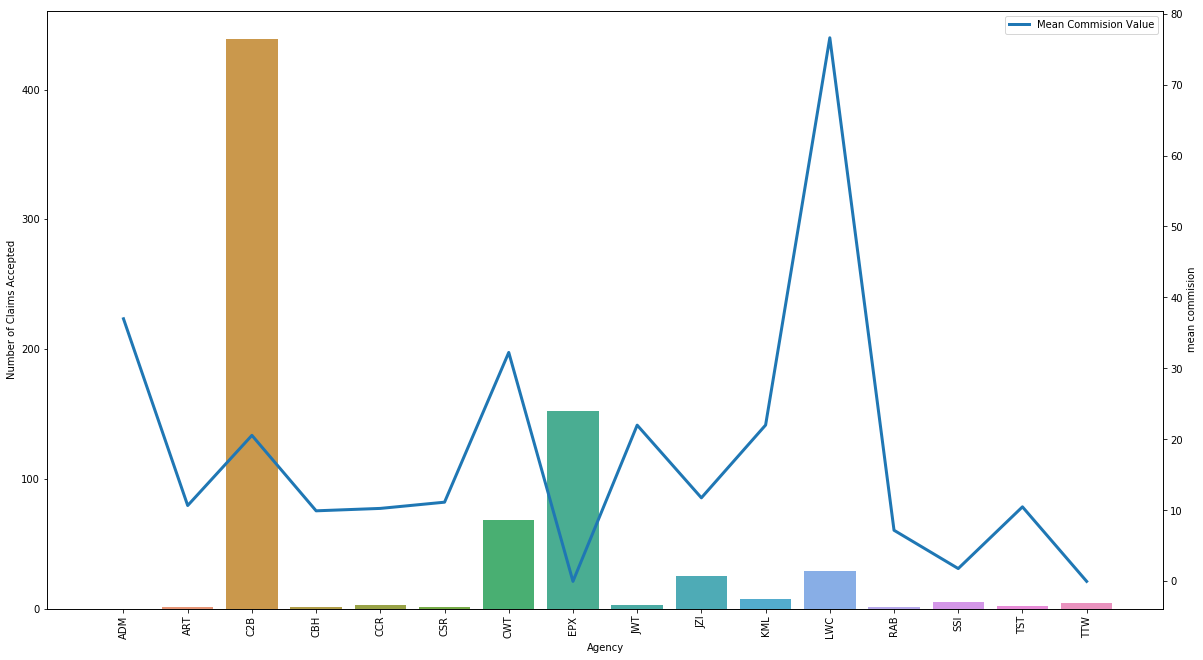

In [6]:
table=pd.crosstab(train["Agency"],train["Claim"])
table['mean commision']=train.groupby('Agency')['Commision (in value)'].mean()
table.head()

fig,ax1=plt.subplots(figsize=(20,11))
sns.barplot(table.index,table["Yes"],ax=ax1)
plt.xticks(rotation=90)
ax1.set(ylabel="Number of Claims Accepted")
ax2=ax1.twinx()
sns.lineplot(table.index,table['mean commision'],ax=ax2,linewidth=3,label="Mean Commision Value")

### Few Agency like C2B, EPX, CWT has good number of Accepted Claims 

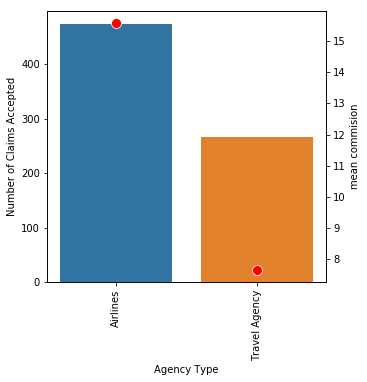

In [10]:
table1=pd.crosstab(train["Agency Type"],train["Claim"])
table1['mean commision']=train.groupby('Agency Type')['Commision (in value)'].mean()
table1.head()

fig,ax1=plt.subplots(figsize=(5,5))
sns.barplot(table1.index,table1["Yes"],ax=ax1)
plt.xticks(rotation=90)
ax1.set(ylabel="Number of Claims Accepted")
ax2=ax1.twinx()
sns.scatterplot(table1.index,table1['mean commision'],ax=ax2,color="red",s=100)

### Airline Agency type  has higher number of Accepted Claims also having high Commision value involved which is logically understandable

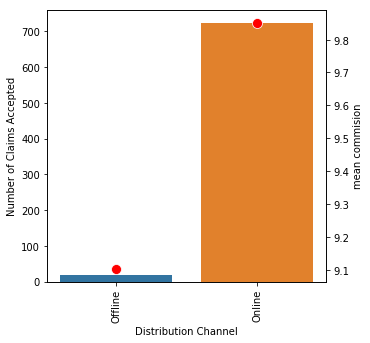

In [11]:
table2=pd.crosstab(train["Distribution Channel"],train["Claim"])
table2['mean commision']=train.groupby('Distribution Channel')['Commision (in value)'].mean()
table2.head()

fig,ax1=plt.subplots(figsize=(5,5))
sns.barplot(table2.index,table2["Yes"],ax=ax1)
plt.xticks(rotation=90)
ax1.set(ylabel="Number of Claims Accepted")
ax2=ax1.twinx()
sns.scatterplot(table2.index,table2['mean commision'],ax=ax2,color="red",s=100)

### Offline Distribution Channel has really really low Number of Claims accepted as compared to Online. Commision Value of both Distribution Channel doesn't seems to be showing much of a difference.

Text(0, 20, 'Overall Mean Commision Value')

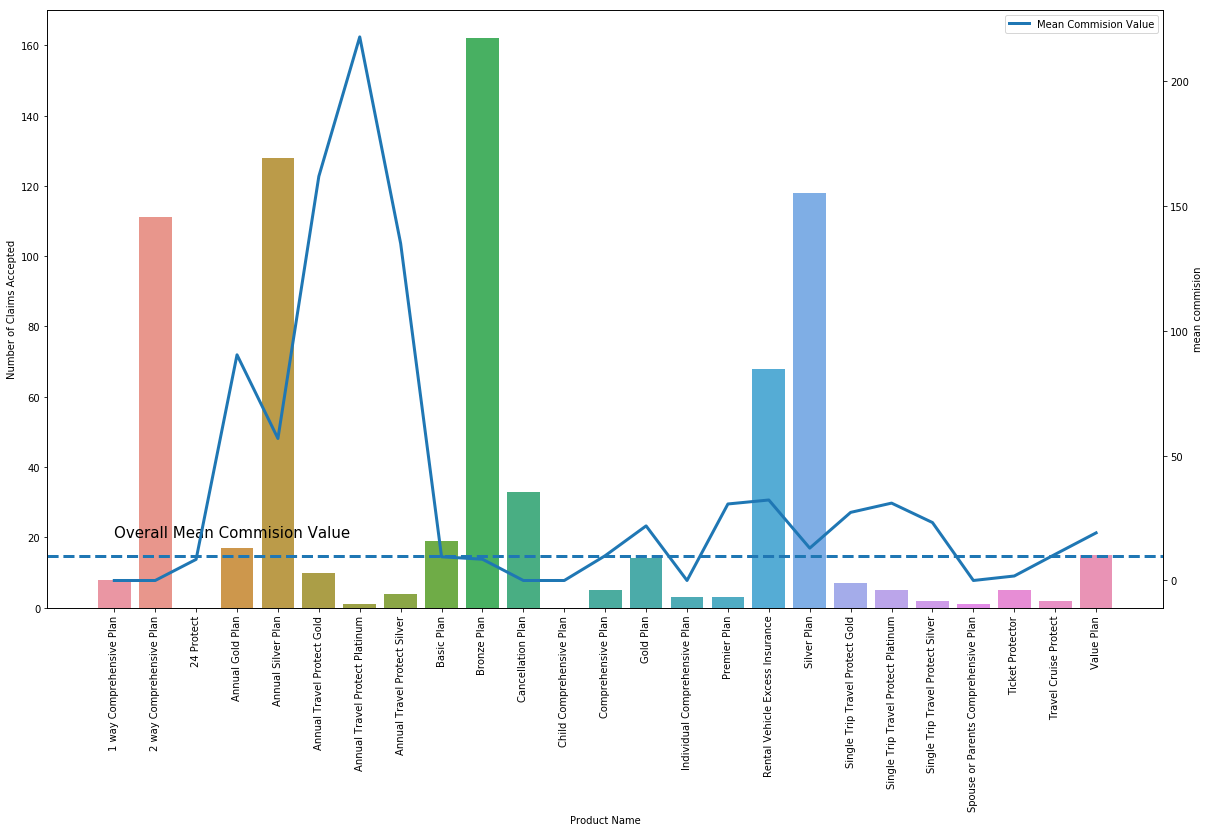

In [12]:
table3=pd.crosstab(train["Product Name"],train["Claim"])
table3['mean commision']=train.groupby('Product Name')['Commision (in value)'].mean()
table3.head()

fig,ax1=plt.subplots(figsize=(20,11))
sns.barplot(table3.index,table3["Yes"],ax=ax1)
plt.xticks(rotation=90)
ax1.set(ylabel="Number of Claims Accepted")
ax2=ax1.twinx()
sns.lineplot(table3.index,table3['mean commision'],ax=ax2,linewidth=3,label="Mean Commision Value")
ax2.axhline(train["Commision (in value)"].mean(), ls='--',linewidth=3)
ax1.text(0,20, "Overall Mean Commision Value",fontsize=15)

### Annual Travel Protect Plan has very high commision value which is logically understandable. 2-Way Comprehensive Plans, Bronze Plan, Silver plan, Annual Silver Plan are performing well in the marked, also having descent Commision Rate.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

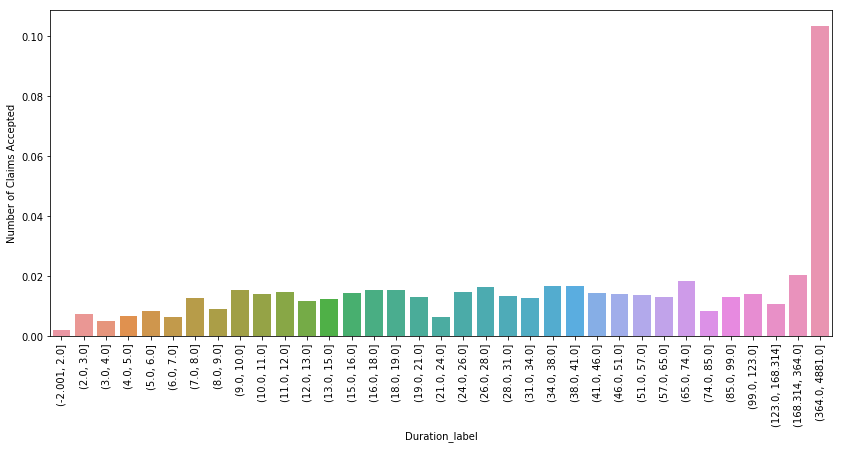

In [13]:
train_copy=train.copy()
train_copy['Duration_label']=pd.qcut(train_copy['Duration'],q=35)
table4=pd.crosstab(train_copy['Duration_label'],train_copy['Claim'],normalize='index')

plt.figure(figsize=(14,6))
sns.barplot(table4.index,table4.Yes)
plt.ylabel("Number of Claims Accepted")
plt.xticks(rotation=90)

### Duration having values greater than 364+ have better Claim Acceptance rate.

Claim,No,Yes,mean commision
Age_Binned,,,
"(0, 15]",67,1,10.760000
"(15, 30]",6982,212,12.266628
"(30, 45]",31553,364,7.201804
"(45, 60]",8171,116,15.512406
"(60, 120]",3037,48,16.186337


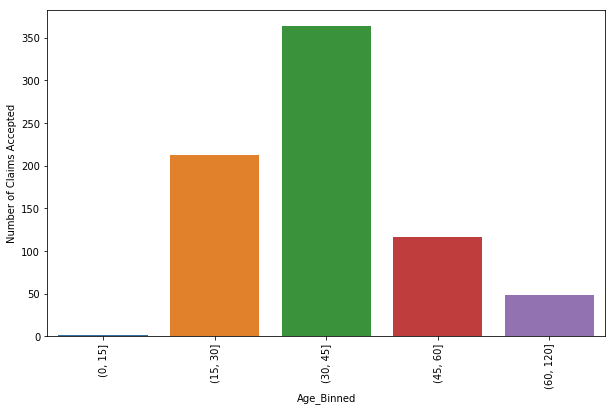

In [14]:
bins = [0, 15, 30, 45, 60, 120]
train_copy["Age_Binned"] = pd.cut(train['Age'], bins)

table5=pd.crosstab(train_copy["Age_Binned"],train["Claim"])
table5['mean commision']=train_copy.groupby('Age_Binned')['Commision (in value)'].mean()
table5

fig,ax1=plt.subplots(figsize=(10,6))
sns.barplot(table5.index,table5["Yes"],ax=ax1)
plt.xticks(rotation=90)
ax1.set(ylabel="Number of Claims Accepted")

table5

### Number of Claims accepted are higher for Age group 30 to 44 followed by Age group 15 to 29. Commision incorporated for all Age groups is comparitivley similar.¶

Claim,No,Yes,mean commision
Destination,,,
SINGAPORE,10158,450,13.121358
CHINA,3802,34,4.654025
UNITED STATES,1988,30,21.801943
THAILAND,4670,29,5.504373
AUSTRALIA,2906,28,25.888504
MALAYSIA,4726,21,6.338300
HONG KONG,1927,15,2.973563
UNITED KINGDOM,1027,13,19.957615
"KOREA, REPUBLIC OF",1169,13,4.643452


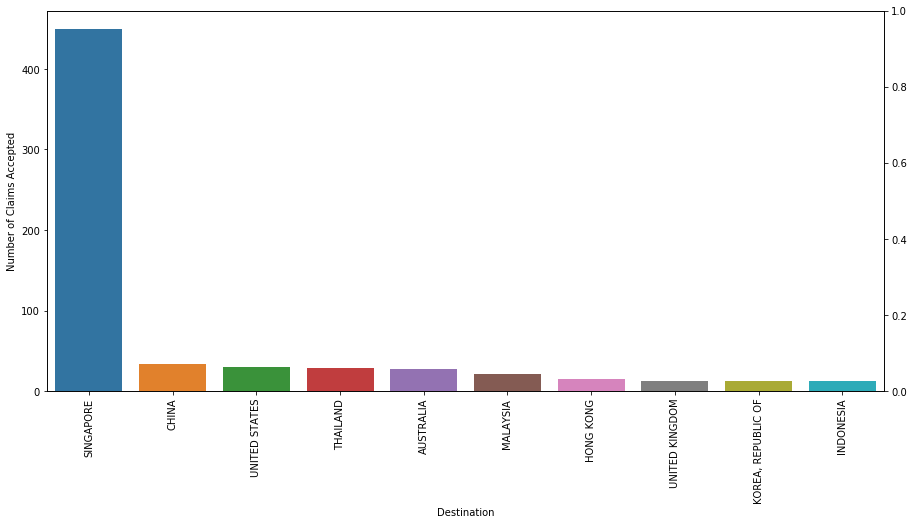

In [15]:
table6=pd.crosstab(train["Destination"],train["Claim"])
table6['mean commision']=train.groupby('Destination')['Commision (in value)'].mean()
table6=table6.sort_values(by='Yes',ascending=False).head(10)

# net_table2=pd.crosstab(train["Destination"],train["Claim"])
# net_table2['Mean Net Sales']=train.groupby('Destination')['Net Sales'].mean()
# net_table2=net_table2.sort_values(by='Yes',ascending=False).head(10)

fig,ax1=plt.subplots(figsize=(15,7))
sns.barplot(table6.index,table6["Yes"],ax=ax1)
plt.xticks(rotation=90)
ax1.set(ylabel="Number of Claims Accepted")
ax2=ax1.twinx()
table6

### Singapore is having good Claim Acceptance number with descent commion. Where as United States, Australia and United Kingdom doesn't show great Claim Acceptance Number but still have high Commision Rate

Claim,No,Yes,Mean Net Sales
Destination,,,
SINGAPORE,10158,450,58.432792
CHINA,3802,34,34.867401
UNITED STATES,1988,30,77.061670
THAILAND,4670,29,25.319696
AUSTRALIA,2906,28,48.021677
MALAYSIA,4726,21,20.957590
HONG KONG,1927,15,28.688903
UNITED KINGDOM,1027,13,62.834183
"KOREA, REPUBLIC OF",1169,13,41.279357


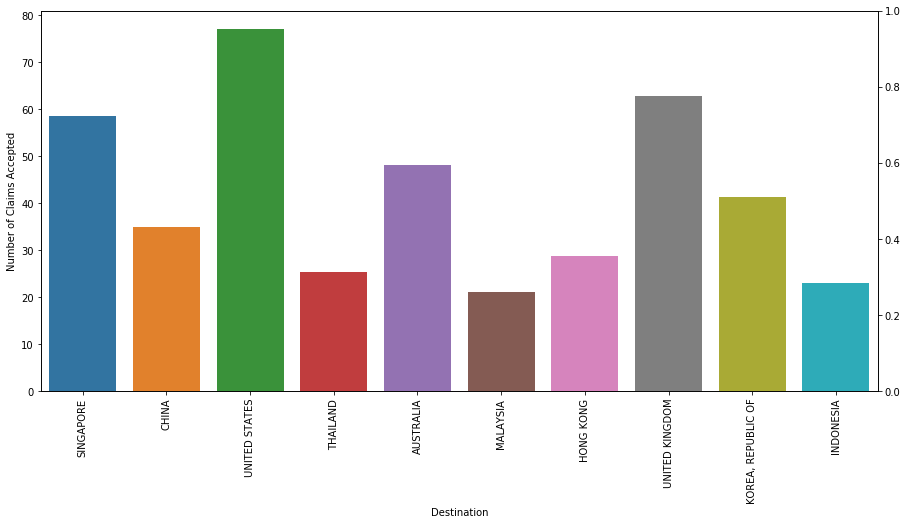

In [20]:
net_table2=pd.crosstab(train["Destination"],train["Claim"])
net_table2['Mean Net Sales']=train.groupby('Destination')['Net Sales'].mean()
net_table2=net_table2.sort_values(by='Yes',ascending=False).head(10)

fig,ax1=plt.subplots(figsize=(15,7))
sns.barplot(net_table2.index,net_table2["Mean Net Sales"],ax=ax1)
plt.xticks(rotation=90)
ax1.set(ylabel="Number of Claims Accepted")
ax2=ax1.twinx()
net_table2

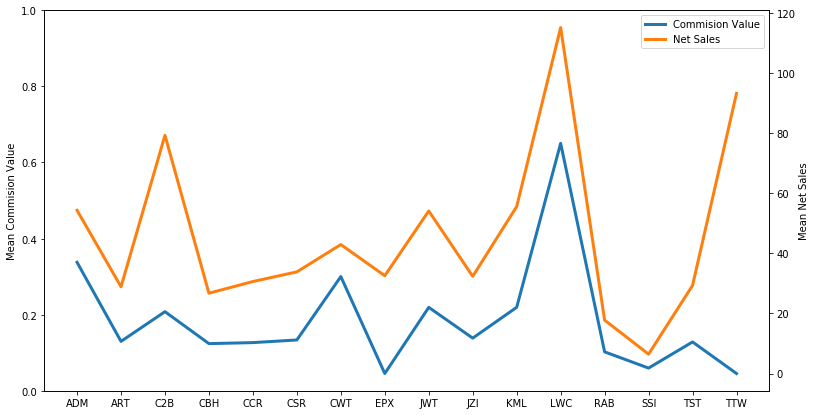

In [385]:
net_table=pd.crosstab(train["Agency"],train["Claim"])
net_table['Mean Net Sales']=train.groupby('Agency')['Net Sales'].mean()
net_table

fig,ax1=plt.subplots(figsize=(13,7))
ax1.set(ylabel="Mean Commision Value")
ax2=ax1.twinx()
sns.lineplot(table.index,table['mean commision'],ax=ax2,linewidth=3,label="Commision Value")
sns.lineplot(net_table.index,net_table['Mean Net Sales'],ax=ax2,linewidth=3,label="Net Sales")

### All Agencies seems have good proportion of Average Net Sales to Average Commision Rate, except Agency named TTW who has good Average Net Sales but making very less Average Commision out of it.

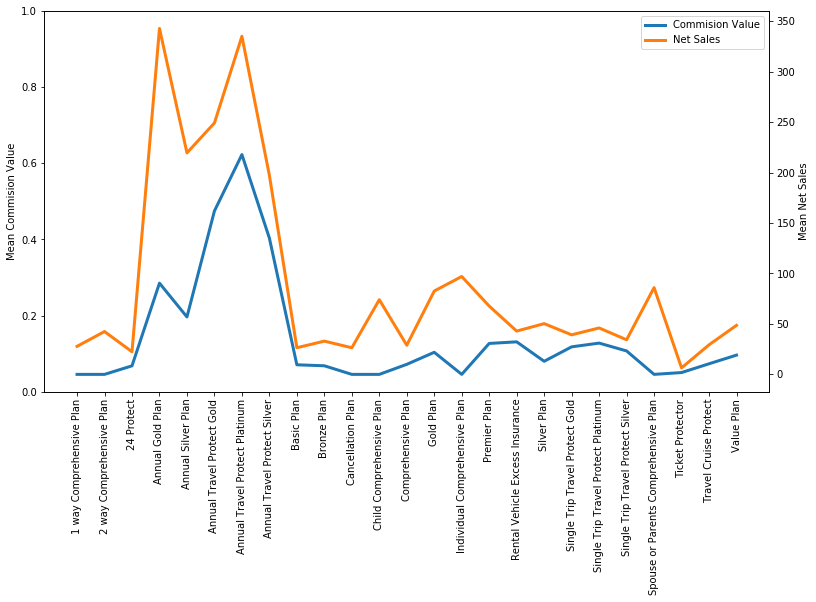

In [384]:
net_table1=pd.crosstab(train["Product Name"],train["Claim"])
net_table1['Mean Net Sales']=train.groupby('Product Name')['Net Sales'].mean()
net_table1

fig,ax1=plt.subplots(figsize=(13,7))
plt.xticks(rotation=90)
ax1.set(ylabel="Mean Commision Value")
ax2=ax1.twinx()
sns.lineplot(table3.index,table3['mean commision'],ax=ax2,linewidth=3,markers=True,label="Commision Value")
sns.lineplot(net_table1.index,net_table1['Mean Net Sales'],ax=ax2,linewidth=3,markers=True,label="Net Sales")

### Few plans like Child Comprehensive Plan, Indivisual Comprehensive Plan, Silver Plan, Spouse or Parents Comprehensive Plan shows increase in Average Net Sales yet considerable dip in average Commision value

Claim,No,Yes,Mean Net Sales
Destination,,,
SINGAPORE,10158,450,58.432792
CHINA,3802,34,34.867401
UNITED STATES,1988,30,77.061670
THAILAND,4670,29,25.319696
AUSTRALIA,2906,28,48.021677
MALAYSIA,4726,21,20.957590
HONG KONG,1927,15,28.688903
UNITED KINGDOM,1027,13,62.834183
"KOREA, REPUBLIC OF",1169,13,41.279357


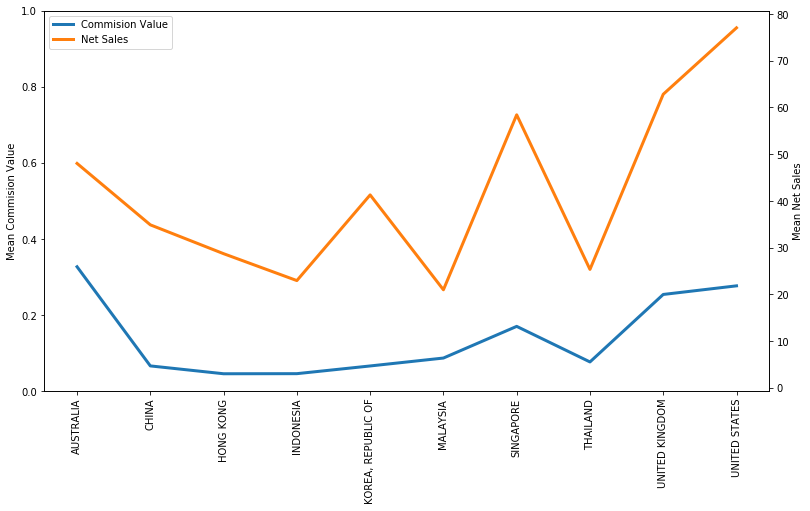

In [383]:
fig,ax1=plt.subplots(figsize=(13,7))
plt.xticks(rotation=90)
ax2=ax1.twinx()
ax1.set(ylabel="Mean Commision Value")
sns.lineplot(table6.index,table6['mean commision'],ax=ax2,linewidth=3,legend='full',label="Commision Value")
sns.lineplot(net_table2.index,net_table2['Mean Net Sales'],ax=ax2,linewidth=3,legend='full',label="Net Sales")

net_table2

### Countries like United State, United Kingdom, Singapore, Australia has great Net Sales, producing corresponding better Commision.

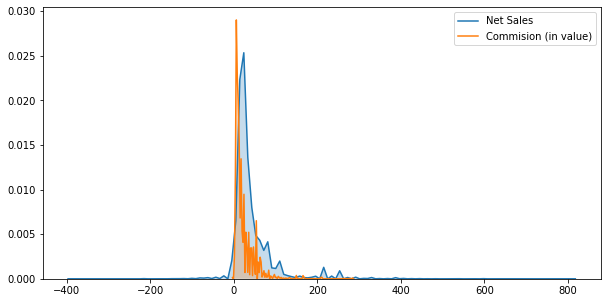

In [280]:
plt.figure(figsize=(10, 5))
for col in ["Net Sales","Commision (in value)"]:
    sns.kdeplot(train[col],shade=True,legend=True)

### Low Net Sales showing High Commission which is practically not possible also you can't have commision if you Net Sales is Zero